# Bibliotecas y Cargue de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from pointpats import centrography
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os


In [2]:
##Los datos fueron descargados del servicio GEOLÓGICO COLOMBIANO 
##EL RESULTADO INICIAL FUE DE 175958 DATOS, DE LOS CUALES TENIAN EVENTO SÍSMICO Y REPLICA
##Se uso la caja de herramientas en Matlab ZMAP usando el algoritmo de Reasenberg para eliminar esos datos dependientes

In [5]:
directorio=r"D:\jromero\TesisMaestria\Eventos Sismicos\REPOSITORIO\tesismaestria"
os.chdir(directorio)

In [6]:
################################################################################
###### CARGUE DE DATOS #########################################################
################################################################################
#RutaUser=input('Ingrese ruta')

Dframe=pd.read_csv("Historicos/Reasenberg/DeclusterReasemberg.csv", delimiter=",")

MpiosCOL = gpd.read_file(r'Shapefile\COLOMBIA DIVISION POLITICA\MGN_MPIO_POLITICO.shp')
DeptoCol= gpd.read_file(r'Shapefile\COLOMBIA DIVISION POLITICA\MGN_DPTO_POLITICO.shp')
BordeCol=gpd.read_file(r'Shapefile\BordeColombia4326.shp')


In [4]:
print(MpiosCOL.crs)
print(DeptoCol.crs)
print(BordeCol.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [5]:
Dframe

Date  Magnitude MagnitudeType  DecimalYear  DayOfYear  \
0      01-Jan-2005 00:10:00        2.8   <undefined>  2005.000019          1   
1      01-Jan-2005 02:51:00        2.2   <undefined>  2005.000325          1   
2      01-Jan-2005 03:33:00        2.3   <undefined>  2005.000405          1   
3      01-Jan-2005 04:16:00        2.1   <undefined>  2005.000487          1   
4      01-Jan-2005 06:25:00        1.9   <undefined>  2005.000732          1   
...                     ...        ...           ...          ...        ...   
75187  28-Feb-2018 19:10:00        1.1   <undefined>  2018.161092         59   
75188  28-Feb-2018 20:23:00        0.6   <undefined>  2018.161231         59   
75189  28-Feb-2018 21:00:00        1.2   <undefined>  2018.161301         59   
75190  28-Feb-2018 22:15:00        1.8   <undefined>  2018.161444         59   
75191  28-Feb-2018 22:38:00        1.5   <undefined>  2018.161488         59   

            X      Y      Z  Longitude  Latitude  Depth  
0     -76.751  8.639   39.9    -76.751     8.639   39.9  
1     -73.006  6.848  150.6    -73.006     6.848  150.6  
2     -73.093  6.813  152.4    -73.093     6.813  152.4  
3     -74.338  5.817   80.1    -74.338     5.817   80.1  
4     -72.973  6.820  149.4    -72.973     6.820  149.4  
...       ...    ...    ...        ...       ...    ...  
75187 -75.885  4.847  108.0    -75.885     4.847  108.0  
75188 -76.080  1.749    2.1    -76.080     1.749    2.1  
75189 -73.041  6.609    0.0    -73.041     6.609    0.0  
75190 -77.497  9.022    3.9    -77.497     9.022    3.9  
75191 -74.884  5.865    3.2    -74.884     5.865    3.2  

[75192 rows x 11 columns]

# Limpieza de los datos

In [6]:
#Seleccionamos solo las columnas de interés
Dframe=Dframe[['Longitude','Latitude','Magnitude','Depth','Date']]

In [7]:
Dframe.info()

###############################################
#LA COLUMNA DATE- FECHA  DEBE SER TIPO DATATIME
##############################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75192 entries, 0 to 75191
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  75192 non-null  float64
 1   Latitude   75192 non-null  float64
 2   Magnitude  75192 non-null  float64
 3   Depth      75192 non-null  float64
 4   Date       75192 non-null  object 
dtypes: float64(4), object(1)
memory usage: 2.9+ MB


In [166]:
#Dframe["Lon"]=Dframe["Lon"].str.replace(',','.')
#Dframe["Lat"]=Dframe["Lat"].str.replace(',','.')
#Dframe['Lon']=Dframe['Lon'].astype(float)
#Dframe['Lat']=Dframe['Lat'].astype(float)

In [ ]:

Dframe['Date']=Dframe['Date'].astype('datetime64[ns]')

In [14]:
###############################################
## FILAS Y COLUMNAS DEL DATAFRAME #############
###############################################

In [8]:
print(Dframe.shape)

(75192, 5)


# RESUMEN ESTADÍSTICO DEL DATAFRAME

In [224]:
print(Dframe.describe())

          Longitude      Latitude     Magnitude         Depth
count  75192.000000  75192.000000  75192.000000  75192.000000
mean     -74.579642      5.931352      1.874597     67.741503
std        1.672377      1.983697      0.609387     58.715590
min      -83.238000     -2.650000      0.100000      0.000000
25%      -76.015000      4.739000      1.400000      6.000000
50%      -73.909000      6.430000      1.800000     58.700000
75%      -73.227000      6.891000      2.200000    125.600000
max      -70.168000     13.670000      6.400000    594.800000


In [19]:
Dframe

Longitude  Latitude  Magnitude  Depth                  Date
0        -76.751     8.639        2.8   39.9  01-Jan-2005 00:10:00
1        -73.006     6.848        2.2  150.6  01-Jan-2005 02:51:00
2        -73.093     6.813        2.3  152.4  01-Jan-2005 03:33:00
3        -74.338     5.817        2.1   80.1  01-Jan-2005 04:16:00
4        -72.973     6.820        1.9  149.4  01-Jan-2005 06:25:00
...          ...       ...        ...    ...                   ...
75187    -75.885     4.847        1.1  108.0  28-Feb-2018 19:10:00
75188    -76.080     1.749        0.6    2.1  28-Feb-2018 20:23:00
75189    -73.041     6.609        1.2    0.0  28-Feb-2018 21:00:00
75190    -77.497     9.022        1.8    3.9  28-Feb-2018 22:15:00
75191    -74.884     5.865        1.5    3.2  28-Feb-2018 22:38:00

[75192 rows x 5 columns]

# Intersección eventos sísmicos con Colombia

In [9]:
##Geometria XY del dataframe

geometry = [Point(xy) for xy in zip(Dframe.Longitude, Dframe.Latitude)]

##Crear DataFrame 

DframeSpatial = GeoDataFrame(Dframe, geometry=geometry)
DframeSpatial.crs = {"init":"epsg:4326"}

DframeSpatial.to_file('EventosSismicosColombia.shp')  

ALL=pd.read_csv("Historicos/TOPEX/AALPlaConTransPlanas.csv", delimiter=",")

geometryALL = [Point(xy) for xy in zip(ALL.Longitud, ALL.Latitud)]

##Crear DataFrame 

DframeSpatialALL = GeoDataFrame(ALL, geometry=geometryALL)
DframeSpatialALL.crs = {"init":"epsg:3116"}
DframeSpatialALL.to_file('ALL.shp', driver='ESRI Shapefile')

In [10]:
EventosCol=gpd.sjoin(DframeSpatial, BordeCol, how='right', op='intersects')

# Gráfico de distribución espacial de los eventos sísmicos 

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
 
ax.set_title('Eventos sísmicos en Colombia entre el año 2015-2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
##MAPA COLOMBIA

BordeCol.plot(ax=ax,edgecolor='b',alpha=0.5)

##PUNTOS EVENTOS SISMICOS

plt.scatter(EventosCol['Longitude'], EventosCol['Latitude'],s=0.8)
#plt.savefig("EventosSismicosCol.jpg") 

In [12]:
EventosColPoints = gpd.GeoDataFrame(
    EventosCol, geometry=gpd.points_from_xy(EventosCol.Longitude, EventosCol.Latitude))

In [26]:
#EventosColPoints.to_file('EventosColPoints.shp', driver='ESRI Shapefile')

In [13]:
EventosColPoints

index_left  Longitude  Latitude  Magnitude  Depth  \
index_right                                                      
0                 72140    -72.547    11.449        3.1    6.5   
0                 30679    -72.527    11.453        1.9   80.0   
0                 21790    -72.486    11.471        2.7   94.3   
0                 36967    -72.242    11.472        2.8   12.5   
0                 51237    -72.704    11.478        3.3   22.5   
...                 ...        ...       ...        ...    ...   
0                 56163    -77.273     0.542        1.5    1.2   
0                 64983    -77.340     0.553        2.0    8.1   
0                 35767    -77.423     0.574        1.5   26.1   
0                 58425    -77.194     0.592        2.1    1.6   
0                 46407    -77.156     0.604        2.7    1.2   

                             Date  Shape_Leng   ADM0_ES ADM0_PCODE ADM0_REF  \
index_right                                                                   
0            05-Nov-2017 18:05:00   97.811686  Colombia         CO     None   
0            09-Jul-2012 10:07:00   97.811686  Colombia         CO     None   
0            02-Apr-2011 23:05:00   97.811686  Colombia         CO     None   
0            02-Jul-2013 03:59:00   97.811686  Colombia         CO     None   
0            17-Apr-2015 00:51:00   97.811686  Colombia         CO     None   
...                           ...         ...       ...        ...      ...   
0            20-Jan-2016 08:50:00   97.811686  Colombia         CO     None   
0            19-Feb-2017 11:25:00   97.811686  Colombia         CO     None   
0            05-May-2013 07:29:00   97.811686  Colombia         CO     None   
0            05-Jun-2016 09:35:00   97.811686  Colombia         CO     None   
0            27-Sep-2014 04:07:00   97.811686  Colombia         CO     None   

            ADM0ALT1ES ADM0ALT2ES        date     validOn validTo  \
index_right                                                         
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
...                ...        ...         ...         ...     ...   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   
0                 None       None  2020-04-15  2020-04-16    None   

              Shape_Le_1  ORIG_FID    Shape_Le_2    Shape_Area  \
index_right                                                      
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
...                  ...       ...           ...           ...   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   
0            10839722.79         0  1.070267e+07  1.140921e+12   

                               geometry  
index_right                              
0            POINT (-72.54700 11.44900)  
0            POINT (-72.52700 11.45300)  
0            POINT (-72.48600 11.47100)  
0            POINT (-72.24200 11.47200)  
0            POINT (-72.70400 11.47800)  
...                                 ...  
0             POINT (-77.27300 0.

In [25]:
################################################################################
# SE VERIFICA EL SISTEMA DE REFERENCIA DEL SHAPE DE COLOMBIA CARGADO PREVIAMENTE 
################################################################################

ANTIOQUIA
CÃRDOBA
CHOCÃ
SUCRE
ATLÃNTICO
BOLÃVAR
MAGDALENA
CESAR
LA GUAJIRA
CAUCA
VALLE DEL CAUCA
HUILA
CAQUETÃ
META
BOYACÃ
CUNDINAMARCA
CALDAS
QUINDIO
RISARALDA
TOLIMA
NARIÃO
NORTE DE SANTANDER
SANTANDER
CASANARE
VAUPÃS
PUTUMAYO
GUAINÃA
VICHADA
AMAZONAS
GUAVIARE
ARCHIPIÃLAGO DE SAN ANDRÃS, PROVIDENCIA Y SANTA CATALINA
ARAUCA
BOGOTÃ, D.C.


C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\423938832.py:17: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.savefig("EventosSismicosColDepto.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\423938832.py:17: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.savefig("EventosSismicosColDepto.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\423938832.py:17: UserWarning: Glyph 141 (\x8d) missing from current font.
  plt.savefig("EventosSismicosColDepto.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\423938832.py:17: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig("EventosSismicosColDepto.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\423938832.py:17: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig("EventosSismicosColDepto.jpg")
D:\Anaconda\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.pri

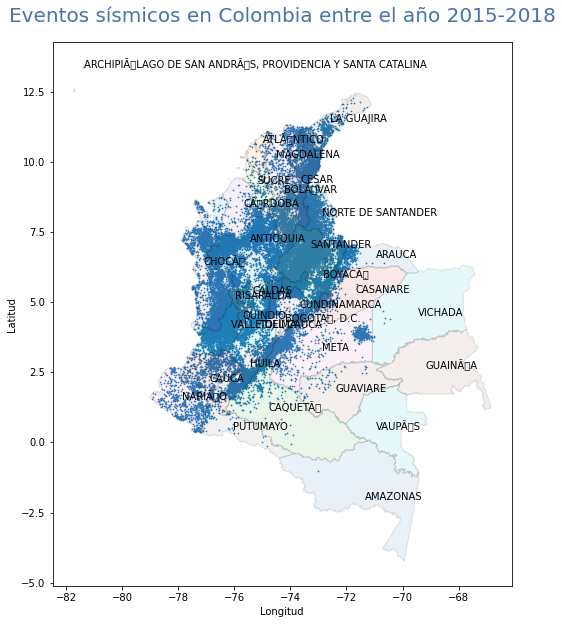

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
 
ax.set_title('Eventos sísmicos en Colombia entre el año 2015-2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
DeptoCol["coords"] = DeptoCol["geometry"].apply(lambda x: x.representative_point().coords[:])
DeptoCol["coords"] = [coords[0] for coords in DeptoCol["coords"]]
##MAPA COLOMBIA
plt.scatter(EventosCol['Longitude'], EventosCol['Latitude'],s=0.5)
DeptoCol.plot(column='DPTO_CNMBR', ax=ax,edgecolor='k',alpha=0.1)
for idx, row in DeptoCol.iterrows():
    print(row['DPTO_CNMBR'])
    plt.annotate(text=row['DPTO_CNMBR'], xy=row['coords'])
##PUNTOS EVENTOS SISMICOS
#plt.savefig("EventosSismicosColDepto.jpg") 


# Eventos sísmicos por departamentos

In [15]:
EventosColDepto=gpd.sjoin(DframeSpatial, DeptoCol, how='right', op='intersects')

In [81]:
EventosColDepto.index[EventosColDepto['DPTO_CNMBR']=="SANTANDER"].value_counts().tolist()[0]

25496

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
 
ax.set_title('Eventos sísmicos en Colombia entre el año 2015-2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
DeptoCol["coords"] = DeptoCol["geometry"].apply(lambda x: x.representative_point().coords[:])
DeptoCol["coords"] = [coords[0] for coords in DeptoCol["coords"]]
##MAPA COLOMBIA
plt.scatter(EventosCol['Longitude'], EventosCol['Latitude'],s=0.5)
DeptoCol.plot(column='DPTO_CNMBR', ax=ax,edgecolor='k',alpha=0.1)
for idx, row in DeptoCol.iterrows():
    print(row['DPTO_CNMBR'])
    plt.annotate(text=row['DPTO_CNMBR']+" : "+str(EventosColDepto.index[EventosColDepto['DPTO_CNMBR']==row['DPTO_CNMBR']].value_counts().tolist()[0]), xy=row['coords'])
    #plt.annotate(text=row['DPTO_CNMBR'], xy=row['coords'])
##PUNTOS EVENTOS SISMICOS
#plt.savefig("EventosSismicosColDeptoCount.jpg") 

ANTIOQUIA
CÃRDOBA
CHOCÃ
SUCRE
ATLÃNTICO
BOLÃVAR
MAGDALENA
CESAR
LA GUAJIRA
CAUCA
VALLE DEL CAUCA
HUILA
CAQUETÃ
META
BOYACÃ
CUNDINAMARCA
CALDAS
QUINDIO
RISARALDA
TOLIMA
NARIÃO
NORTE DE SANTANDER
SANTANDER
CASANARE
VAUPÃS
PUTUMAYO
GUAINÃA
VICHADA
AMAZONAS
GUAVIARE
ARCHIPIÃLAGO DE SAN ANDRÃS, PROVIDENCIA Y SANTA CATALINA
ARAUCA
BOGOTÃ, D.C.


C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\3254246329.py:18: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.savefig("EventosSismicosColDeptoCount.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\3254246329.py:18: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.savefig("EventosSismicosColDeptoCount.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\3254246329.py:18: UserWarning: Glyph 141 (\x8d) missing from current font.
  plt.savefig("EventosSismicosColDeptoCount.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\3254246329.py:18: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig("EventosSismicosColDeptoCount.jpg")
C:\Users\jromero\AppData\Local\Temp\ipykernel_32908\3254246329.py:18: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.savefig("EventosSismicosColDeptoCount.jpg")
D:\Anaconda\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from 

# Histogramas de magnitud y profundidad

<AxesSubplot:>

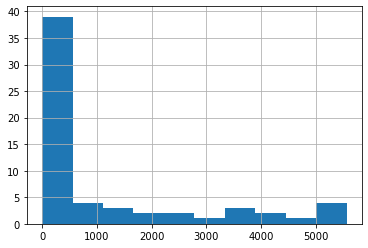

In [91]:
EventosColPoints[['Magnitude']].value_counts().hist()

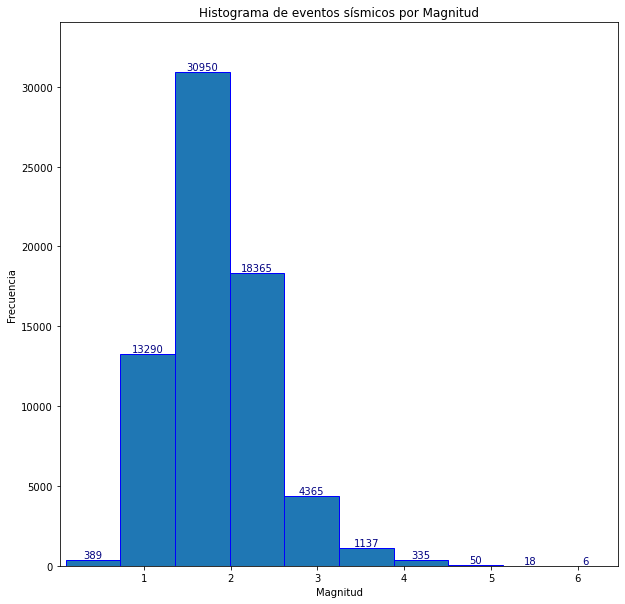

In [92]:

plt.figure(figsize=(10, 10))
values, bins, bars = plt.hist(EventosColPoints['Magnitude'], edgecolor='blue')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title("Histograma de eventos sísmicos por Magnitud")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
#plt.savefig("HistMagnitud.jpg") 
plt.show()


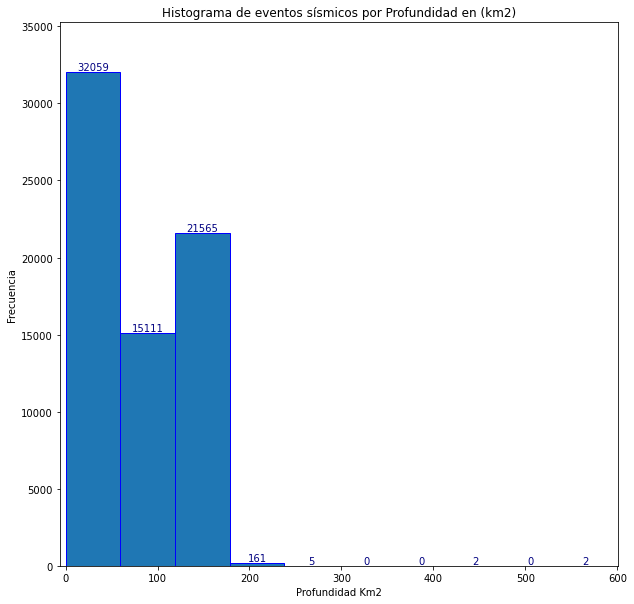

In [32]:

plt.figure(figsize=(10, 10))
values, bins, bars = plt.hist(EventosColPoints['Depth'], edgecolor='blue')
plt.xlabel('Profundidad Km2')
plt.ylabel('Frecuencia')
plt.title("Histograma de eventos sísmicos por Profundidad en (km2)")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.savefig("HistProfundidad.jpg") 
plt.show()

# Eventos sísmicos por año

In [34]:
EventosColPoints['Anno'] = pd.DatetimeIndex(EventosColPoints['Date']).year
EventosColPoints

index_left  Longitude  Latitude  Magnitude  Depth  \
index_right                                                      
0                 72140    -72.547    11.449        3.1    6.5   
0                 30679    -72.527    11.453        1.9   80.0   
0                 21790    -72.486    11.471        2.7   94.3   
0                 36967    -72.242    11.472        2.8   12.5   
0                 51237    -72.704    11.478        3.3   22.5   
...                 ...        ...       ...        ...    ...   
0                 56163    -77.273     0.542        1.5    1.2   
0                 64983    -77.340     0.553        2.0    8.1   
0                 35767    -77.423     0.574        1.5   26.1   
0                 58425    -77.194     0.592        2.1    1.6   
0                 46407    -77.156     0.604        2.7    1.2   

                             Date  Shape_Leng   ADM0_ES ADM0_PCODE ADM0_REF  \
index_right                                                                   
0            05-Nov-2017 18:05:00   97.811686  Colombia         CO     None   
0            09-Jul-2012 10:07:00   97.811686  Colombia         CO     None   
0            02-Apr-2011 23:05:00   97.811686  Colombia         CO     None   
0            02-Jul-2013 03:59:00   97.811686  Colombia         CO     None   
0            17-Apr-2015 00:51:00   97.811686  Colombia         CO     None   
...                           ...         ...       ...        ...      ...   
0            20-Jan-2016 08:50:00   97.811686  Colombia         CO     None   
0            19-Feb-2017 11:25:00   97.811686  Colombia         CO     None   
0            05-May-2013 07:29:00   97.811686  Colombia         CO     None   
0            05-Jun-2016 09:35:00   97.811686  Colombia         CO     None   
0            27-Sep-2014 04:07:00   97.811686  Colombia         CO     None   

             ... ADM0ALT2ES        date     validOn validTo   Shape_Le_1  \
index_right  ...                                                           
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
...          ...        ...         ...         ...     ...          ...   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   

             ORIG_FID    Shape_Le_2    Shape_Area                    geometry  \
index_right                                                                     
0                   0  1.070267e+07  1.140921e+12  POINT (-72.54700 11.44900)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.52700 11.45300)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.48600 11.47100)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.24200 11.47200)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.70400 11.47800)   
...               ...           ...           ...                         ...   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.27300 0.54200)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.34000 0.55300)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.42300 0.57400)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.19400 0.59200)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.15600 0.60400)   

             Anno  
index_right        
0            2017  
0            2012  
0  

In [38]:
EventosColPoints

index_left  Longitude  Latitude  Magnitude  Depth  \
index_right                                                      
0                 72140    -72.547    11.449        3.1    6.5   
0                 30679    -72.527    11.453        1.9   80.0   
0                 21790    -72.486    11.471        2.7   94.3   
0                 36967    -72.242    11.472        2.8   12.5   
0                 51237    -72.704    11.478        3.3   22.5   
...                 ...        ...       ...        ...    ...   
0                 56163    -77.273     0.542        1.5    1.2   
0                 64983    -77.340     0.553        2.0    8.1   
0                 35767    -77.423     0.574        1.5   26.1   
0                 58425    -77.194     0.592        2.1    1.6   
0                 46407    -77.156     0.604        2.7    1.2   

                             Date  Shape_Leng   ADM0_ES ADM0_PCODE ADM0_REF  \
index_right                                                                   
0            05-Nov-2017 18:05:00   97.811686  Colombia         CO     None   
0            09-Jul-2012 10:07:00   97.811686  Colombia         CO     None   
0            02-Apr-2011 23:05:00   97.811686  Colombia         CO     None   
0            02-Jul-2013 03:59:00   97.811686  Colombia         CO     None   
0            17-Apr-2015 00:51:00   97.811686  Colombia         CO     None   
...                           ...         ...       ...        ...      ...   
0            20-Jan-2016 08:50:00   97.811686  Colombia         CO     None   
0            19-Feb-2017 11:25:00   97.811686  Colombia         CO     None   
0            05-May-2013 07:29:00   97.811686  Colombia         CO     None   
0            05-Jun-2016 09:35:00   97.811686  Colombia         CO     None   
0            27-Sep-2014 04:07:00   97.811686  Colombia         CO     None   

             ... ADM0ALT2ES        date     validOn validTo   Shape_Le_1  \
index_right  ...                                                           
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
...          ...        ...         ...         ...     ...          ...   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   
0            ...       None  2020-04-15  2020-04-16    None  10839722.79   

             ORIG_FID    Shape_Le_2    Shape_Area                    geometry  \
index_right                                                                     
0                   0  1.070267e+07  1.140921e+12  POINT (-72.54700 11.44900)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.52700 11.45300)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.48600 11.47100)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.24200 11.47200)   
0                   0  1.070267e+07  1.140921e+12  POINT (-72.70400 11.47800)   
...               ...           ...           ...                         ...   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.27300 0.54200)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.34000 0.55300)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.42300 0.57400)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.19400 0.59200)   
0                   0  1.070267e+07  1.140921e+12   POINT (-77.15600 0.60400)   

             Anno  
index_right        
0            2017  
0            2012  
0  

In [44]:
EventosColPoints2014=EventosColPoints[EventosColPoints["Anno"]==2014]

In [53]:

#EventosColPoints2014.to_file('EventosColPoints2014.shp', driver='ESRI Shapefile')

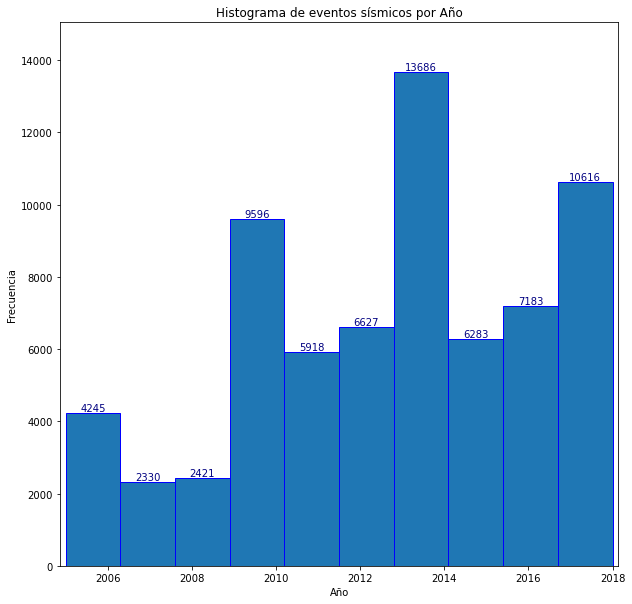

In [43]:
plt.figure(figsize=(10, 10))
values, bins, bars = plt.hist(EventosColPoints['Anno'], edgecolor='blue')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title("Histograma de eventos sísmicos por Año")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.savefig("HistEvenAnno.jpg") 
plt.show()


figura,ejes = plt.subplots(3,figsize=(15, 15))
Dframe['Magnitude'].hist(ax=ejes[0])
Dframe['Depth'].hist(ax=ejes[1])
Dframe['Date'].hist(ax=ejes[2])


ejes[0].set_title("Histograma Magnitud de los eventos sísmicos")

ejes[1].set_title("Profundidades de los eventos sísmicos (km)")

ejes[2].set_title("Histograma de eventos sísmicos por año")

plt.subplots_adjust(
                    wspace=0.5,
                    hspace=1.5)

plt.show()

## el histograma de magnitud de eventos sísmicos se concentra en magnitudes de 2-3. Se ve la distribución de Poisson
## El histograma de los eventos sísmicos por año para ser ser uniforme

In [ ]:
EventosCol[["Longitude","Latitude","Magnitude","Depth","Anno"]]
#EventosCol.to_file('Shapefile/EventosCol.shp', driver='ESRI Shapefile')

# Conteo de eventos por magnitud

In [246]:
EventosCol['Magnitude'].value_counts()

1.5    5557
1.6    5530
1.7    5348
1.4    5168
1.8    4929
       ... 
6.3       1
5.1       1
6.2       1
5.5       1
5.9       1
Name: Magnitude, Length: 61, dtype: int64

# Conteo eventos sísmicos por profundidades mayores a 100

In [247]:
EventosCol['Depth'][EventosCol['Depth']>200].value_counts()

256.3    1
233.2    1
422.7    1
594.8    1
211.6    1
206.6    1
255.8    1
232.1    1
210.6    1
220.6    1
268.1    1
259.2    1
203.4    1
229.3    1
436.5    1
292.7    1
217.0    1
569.6    1
203.7    1
210.8    1
235.0    1
Name: Depth, dtype: int64

In [2]:
EventosCol= gpd.read_file(r'D:\jromero\TesisMaestria\Eventos Sismicos\REPOSITORIO\tesismaestria\EventosColPoints2014.shp')

# Gráfico de distribución de eventos sísmicos y tendencia de los eventos

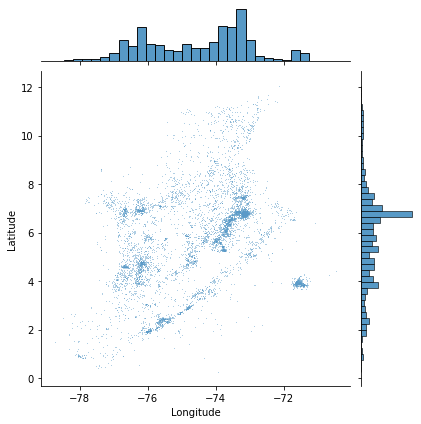

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
 
ax.set_title('Eventos sísmicos en Colombia entre el año 2015-2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
##MAPA COLOMBIA

BordeCol.plot()

##PUNTOS EVENTOS SISMICOS

sns.jointplot(x='Longitude', y='Latitude', data=EventosCol, s=0.5);

# Mapa de Calor eventos sísmicos

D:\Anaconda\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


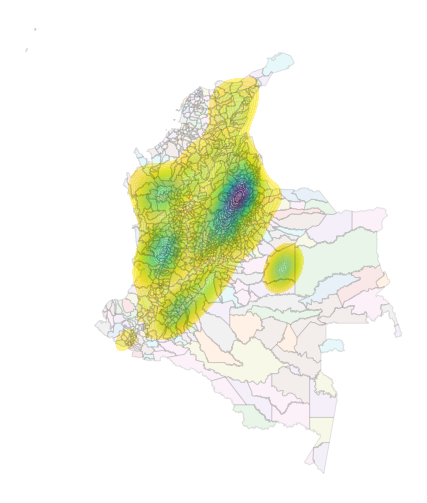

In [9]:

f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    EventosCol['Longitude'], 
    EventosCol['Latitude'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
MpiosCOL.plot(column='MPIO_CNMBR', ax=ax,edgecolor='k',alpha=0.1)
# Remove axes
ax.set_axis_off()

In [11]:
mean_center = centrography.mean_center(EventosCol[['Latitude', 'Longitude']])
med_center = centrography.euclidean_median(EventosCol[['Latitude', 'Longitude']])

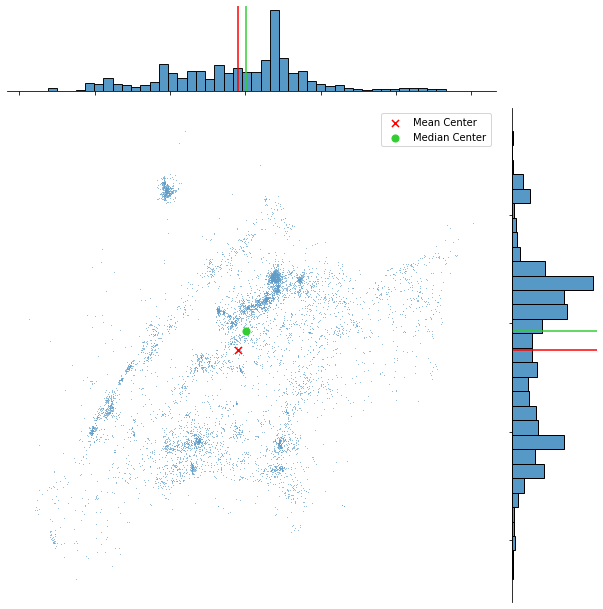

In [12]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x='Latitude', y='Longitude', data=EventosCol, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()

# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

# Intersección espacial de los eventos por municipios

In [58]:
##Geometria XY del dataframe

geometry = [Point(xy) for xy in zip(Dframe.Longitude, Dframe.Latitude)]

##Crear DataFrame 

DframeSpatial = GeoDataFrame(Dframe, geometry=geometry)


In [ ]:
#######################################################
### ASIGNAMOS SISTEMA DE REFERENCIA A LOS PUNTOS XY
#######################################################

In [68]:
DframeSpatial.set_crs(epsg=4326, inplace=True)

Longitude  Latitude  Magnitude  Depth                Date  \
0        -76.751     8.639        2.8   39.9 2005-01-01 00:10:00   
1        -73.006     6.848        2.2  150.6 2005-01-01 02:51:00   
2        -73.093     6.813        2.3  152.4 2005-01-01 03:33:00   
3        -74.338     5.817        2.1   80.1 2005-01-01 04:16:00   
5        -72.972     6.806        2.4  156.0 2005-01-01 07:01:00   
...          ...       ...        ...    ...                 ...   
75165    -75.400     4.501        3.2    0.0 2018-02-27 12:21:00   
75170    -71.835     6.786        3.1    0.0 2018-02-27 15:13:00   
75172    -73.082     7.570        2.3  157.1 2018-02-27 18:58:00   
75173    -75.273     2.492        2.3    4.0 2018-02-27 19:16:00   
75178    -72.262    11.498        2.1    4.0 2018-02-27 21:51:00   

                         geometry  
0       POINT (-76.75100 8.63900)  
1       POINT (-73.00600 6.84800)  
2       POINT (-73.09300 6.81300)  
3       POINT (-74.33800 5.81700)  
5       POINT (-72.97200 6.80600)  
...                           ...  
75165   POINT (-75.40000 4.50100)  
75170   POINT (-71.83500 6.78600)  
75172   POINT (-73.08200 7.57000)  
75173   POINT (-75.27300 2.49200)  
75178  POINT (-72.26200 11.49800)  

[24727 rows x 6 columns]

In [88]:
#######################################################
###                INTERSECCIÓN 
#######################################################

In [35]:
DframeSpatialInter=gpd.overlay(DframeSpatial, MpiosCOL, how='intersection')

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.

# Conteo de eventos sísmicos por departamento

In [73]:
DframeSpatialInter['DPTO_CNMBR'].value_counts()

#El departamento con mayor actividad sísmica es Santander y Antioquia

SANTANDER             6229
ANTIOQUIA             1892
CHOCÓ                 1502
VALLE DEL CAUCA       1418
CUNDINAMARCA          1407
META                  1268
CESAR                 1035
HUILA                  929
BOYACÁ                 854
NORTE DE SANTANDER     603
BOLÍVAR                445
TOLIMA                 443
NARIÑO                 340
CAUCA                  313
LA GUAJIRA             306
CAQUETÁ                264
MAGDALENA              252
CASANARE               173
ARAUCA                 142
CÓRDOBA                129
RISARALDA               99
SUCRE                   85
CALDAS                  76
QUINDIO                 67
GUAVIARE                49
PUTUMAYO                38
ATLÁNTICO               18
VICHADA                  8
BOGOTÁ, D.C.             4
AMAZONAS                 1
Name: DPTO_CNMBR, dtype: int64

# Conteo de eventos sísmicos por Departamento-Municipio

In [76]:
DframeSpatialInter[['MPIO_CNMBR','DPTO_CNMBR']].value_counts()

MPIO_CNMBR            DPTO_CNMBR  
LOS SANTOS            SANTANDER       1006
ZAPATOCA              SANTANDER        670
PUERTO GAITÁN         META             613
PIEDECUESTA           SANTANDER        481
EL CARMEN DE CHUCURI  SANTANDER        472
                                      ... 
QUÍPAMA               BOYACÁ             1
REMOLINO              MAGDALENA          1
RICAURTE              CUNDINAMARCA       1
RONDÓN                BOYACÁ             1
ÚTICA                 CUNDINAMARCA       1
Length: 875, dtype: int64

# Selección de los municipios donde hubo un evento sísmico con magnitud mayor a 6

In [78]:
DframeSpatialInter['MPIO_CNMBR'][DframeSpatialInter['Magnitude']>6]

1403      LOS SANTOS
13239    SAN AGUSTÍN
16782    GUAITARILLA
18039           MANÍ
Name: MPIO_CNMBR, dtype: object

# Selección de los municipios donde hubo un evento sísmico con magnitud mayor a 6 y profundidad mayor a 150 km

In [86]:
DframeSpatialInter.query('Magnitude>6 & Depth>150')

Longitude  Latitude  Magnitude  Depth                Date DPTO_CCDGO  \
1403     -73.134     6.825        6.3  157.7 2015-03-10 20:55:00         68   
13239    -76.555     1.971        6.4  171.9 2012-09-30 16:31:00         41   
16782    -77.561     1.113        6.4  162.8 2013-02-09 14:16:00         52   
18039    -72.396     4.733        6.2  569.6 2007-01-29 07:47:00         85   

      MPIO_CCDGO MPIO_CDPMP DPTO_CNMBR   MPIO_CNMBR  \
1403         418      68418  SANTANDER   LOS SANTOS   
13239        668      41668      HUILA  SAN AGUSTÍN   
16782        320      52320     NARIÑO  GUAITARILLA   
18039        139      85139   CASANARE         MANÍ   

                                MPIO_CRSLC   MPIO_NAREA MPIO_CSMBL  MPIO_VGNC  \
1403                                  1750   290.125188          4       2020   
13239  Ordenanza 24 del 8 de Abril de 1926  1390.432191          4       2020   
16782                                 1676   116.739782          4       2020   
18039                                 1953  3754.548524          4       2020   

       MPIO_TIPO  SHAPE_AREA  SHAPE_LEN                   geometry  
1403   MUNICIPIO    0.023726   0.657775  POINT (-73.13400 6.82500)  
13239  MUNICIPIO    0.112833   2.032643  POINT (-76.55500 1.97100)  
16782  MUNICIPIO    0.009451   0.488589  POINT (-77.56100 1.11300)  
18039  MUNICIPIO    0.305688   4.153614  POINT (-72.39600 4.73300)

# Selección de los municipios donde hubo un evento sísmico con magnitud mayor a 6 y profundidad menor a 50 km

In [87]:
DframeSpatialInter.query('Magnitude>5 & Depth<50')

Longitude  Latitude  Magnitude  Depth                Date DPTO_CCDGO  \
5529     -74.636     3.405        5.2   13.2 2016-10-31 00:20:00         41   
5538     -74.716     3.382        5.3    0.0 2017-02-06 13:02:00         41   
5940     -72.222     7.172        5.7    0.0 2007-06-20 19:04:00         54   
6073     -76.774     4.642        5.2   19.0 2014-01-05 03:36:00         27   
6612     -75.158     3.959        5.1    1.5 2010-07-29 19:34:00         73   
7782     -75.916     5.716        5.3   15.0 2007-04-24 08:53:00         05   
10785    -71.717     6.502        5.3   42.6 2014-02-17 09:41:00         81   
10910    -71.380    11.913        5.9   36.7 2006-01-01 09:43:00         44   
11013    -76.084     4.572        5.2    5.0 2005-03-08 15:59:00         76   
11014    -76.057     4.529        5.2   25.4 2005-03-08 15:59:00         76   
17729    -73.813     4.400        5.7    0.3 2008-05-24 19:20:00         25   

      MPIO_CCDGO MPIO_CDPMP          DPTO_CNMBR MPIO_CNMBR  \
5529         206      41206               HUILA   COLOMBIA   
5538         206      41206               HUILA   COLOMBIA   
5940         820      54820  NORTE DE SANTANDER     TOLEDO   
6073         745      27745               CHOCÓ       SIPÍ   
6612         504      73504              TOLIMA     ORTEGA   
7782         091      05091           ANTIOQUIA    BETANIA   
10785        794      81794              ARAUCA       TAME   
10910        847      44847          LA GUAJIRA     URIBIA   
11013        400      76400     VALLE DEL CAUCA   LA UNIÓN   
11014        400      76400     VALLE DEL CAUCA   LA UNIÓN   
17729        279      25279        CUNDINAMARCA    FÓMEQUE   

                                 MPIO_CRSLC   MPIO_NAREA MPIO_CSMBL  \
5529                                   1886  1584.969918          4   
5538                                   1886  1584.969918          4   
5940                                   1886  1480.665015          4   
6073                   Ordenanza 14 de 1956  1576.865041          4   
6612                                   1843   953.804325          4   
7782   Ordenanza 42 del 24 de Abril de 1920   180.525987          4   
10785                                  1959  5418.708890          4   
10910                                  1954  7886.058126          4   
11013                  Ordenanza 15 de 1890   120.874949          4   
11014                  Ordenanza 15 de 1890   120.874949          4   
17729                                  1593   460.175352          4   

       MPIO_VGNC  MPIO_TIPO  SHAPE_AREA  SHAPE_LEN                    geometry  
5529        2020  MUNICIPIO    0.128978   2.344524   POINT (-74.63600 3.40500)  
5538        2020  MUNICIPIO    0.128978   2.344524   POINT (-74.71600 3.38200)  
5940        2020  MUNICIPIO    0.121113   2.081923   POINT (-72.22200 7.17200)  
6073        2020  MUNICIPIO    0.128270   2.218292   POINT (-76.77400 4.64200)  
6612        2020  MUNICIPIO    0.077632   1.551463   POINT (-75.15800 3.95900)  
7782        2020  MUNICIPIO    0.014721   0.692306   POINT (-75.91600 5.71600)  
10785       2020  MUNICIPIO    0.442190   3.938087   POINT (-71.71700 6.50200)  
10910       2020  MUNICIPIO    0.653549   6.112712  POINT (-71.38000 11.91300)  
11013       2020  MUNICIPIO    0.009838   0.538919   POINT (-76.08400 4.57200)  
11014       2020  MUNICIPIO    0.009838   0.538919   POINT (-76.05700 4.52900)  
17729       2020  MUNICIPIO    0.037498   0.992036   POINT (-73.81300 4.40000)

# DataFrame variables de correlación

In [20]:
DframeCorr=Dframe[['Magnitude','Depth']]

<AxesSubplot:>

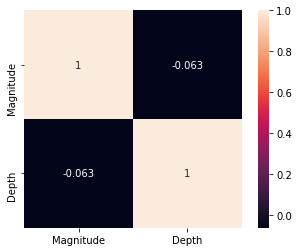

In [21]:
sns.heatmap(DframeCorr.corr(), square=True, annot=True)

# Filtros y gráficos de los eventos sísmicos mayor a 5 de magnitud y 200 km de profundidad

In [65]:
Dframe['Magnitude'].max()

6.4

In [66]:
Dframe['Depth'].max()

594.8

In [34]:
DframeAltMag=Dframe[Dframe['Magnitude']>5]
DframeAltDepth=Dframe[Dframe['Depth']>200]

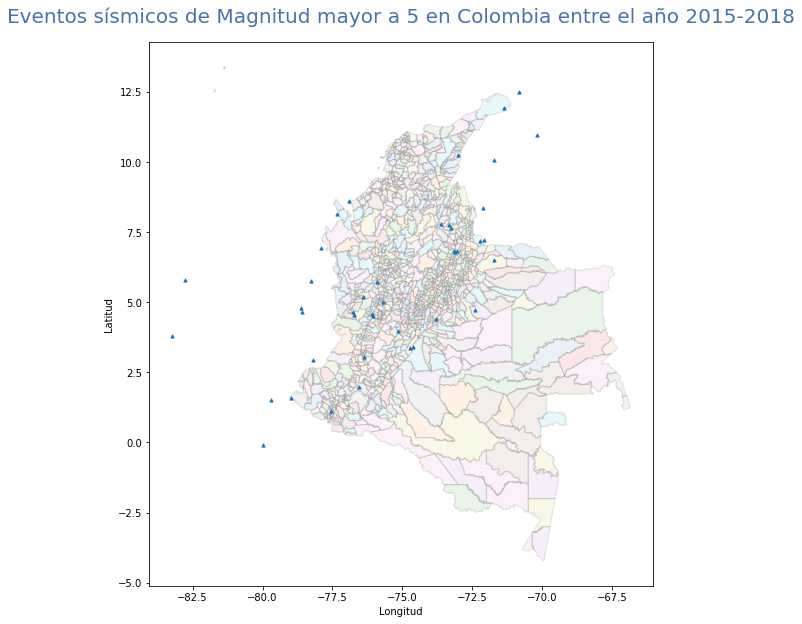

In [31]:

fig, ax = plt.subplots(figsize=(10, 10))
 
ax.set_title('Eventos sísmicos de Magnitud mayor a 5 en Colombia entre el año 2015-2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 

MpiosCOL.plot(column='MPIO_CNMBR', ax=ax,edgecolor='k',alpha=0.1)
plt.scatter(DframeAltMag['Longitude'], DframeAltMag['Latitude'],s=10, marker="^")

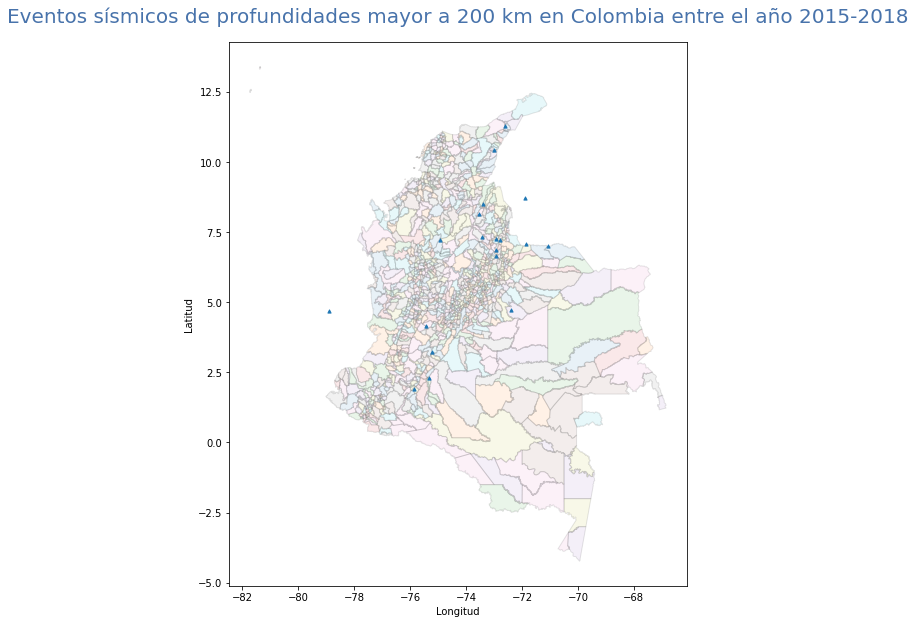

In [36]:

fig, ax = plt.subplots(figsize=(10, 10))
 

ax.set_title('Eventos sísmicos de profundidades mayor a 200 km en Colombia entre el año 2015-2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 


MpiosCOL.plot(column='MPIO_CNMBR', ax=ax,edgecolor='k',alpha=0.1)
plt.scatter(DframeAltDepth['Longitude'], DframeAltDepth['Latitude'],s=10, marker="^")

In [45]:
mean_center = centrography.mean_center(Dframe[['Latitude', 'Longitude']])
med_center = centrography.euclidean_median(Dframe[['Latitude', 'Longitude']])

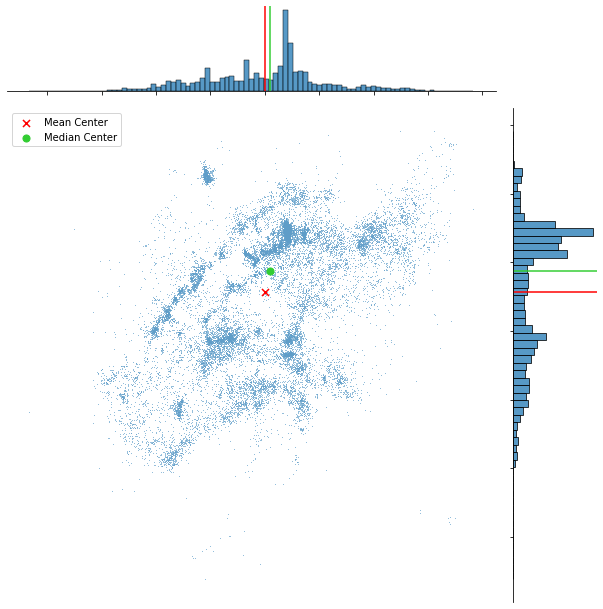

In [49]:
# Generate scatter plot
joint_axes = sns.jointplot(
    x='Latitude', y='Longitude', data=Dframe, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()

# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()